<div style="text-align: center; font-family: 'Trebuchet MS', Arial, sans-serif; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0">
  TOPIC: ANALYSIS ON SPOTIFY MUSIC DATASET
</div>

### IMPORT LIBRARY

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#read files
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13104\1113171767.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [28]:
df = pd.read_csv("../data/clean_data.csv")
df= df.reset_index()
df.rename(columns={'index':'id'},inplace = True)
df['id'] = df['id'] + 10000
df.head()

,id,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,10000,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,10001,"thank u, next","thank u, next",Ariana Grande,2019-02-08,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,10002,EARFQUAKE,IGOR,"Tyler, The Creator",2019-05-17,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,10003,Lose You To Love Me,Rare,Selena Gomez,2020-01-10,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,10004,High Hopes,Pray for the Wicked,Panic! At The Disco,2018-06-22,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


In [29]:
song_id = df[["id", "name", "album","artist","release_date"]]
data = df.drop(["id", "name","album", "artist","release_date"], axis = 1).copy()
data.head()

,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,171360,84,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,85.026,4
1,207320,82,0.717,0.22900,0.653,0.000000,0.1010,-5.634,0.0658,106.966,4
2,190066,82,0.554,0.23000,0.498,0.000006,0.7950,-8.866,0.0685,79.635,4
3,206458,82,0.488,0.55600,0.343,0.000000,0.2100,-8.985,0.0436,102.819,4
4,190946,82,0.579,0.19300,0.904,0.000000,0.0640,-2.729,0.0618,82.014,4


<Axes: >

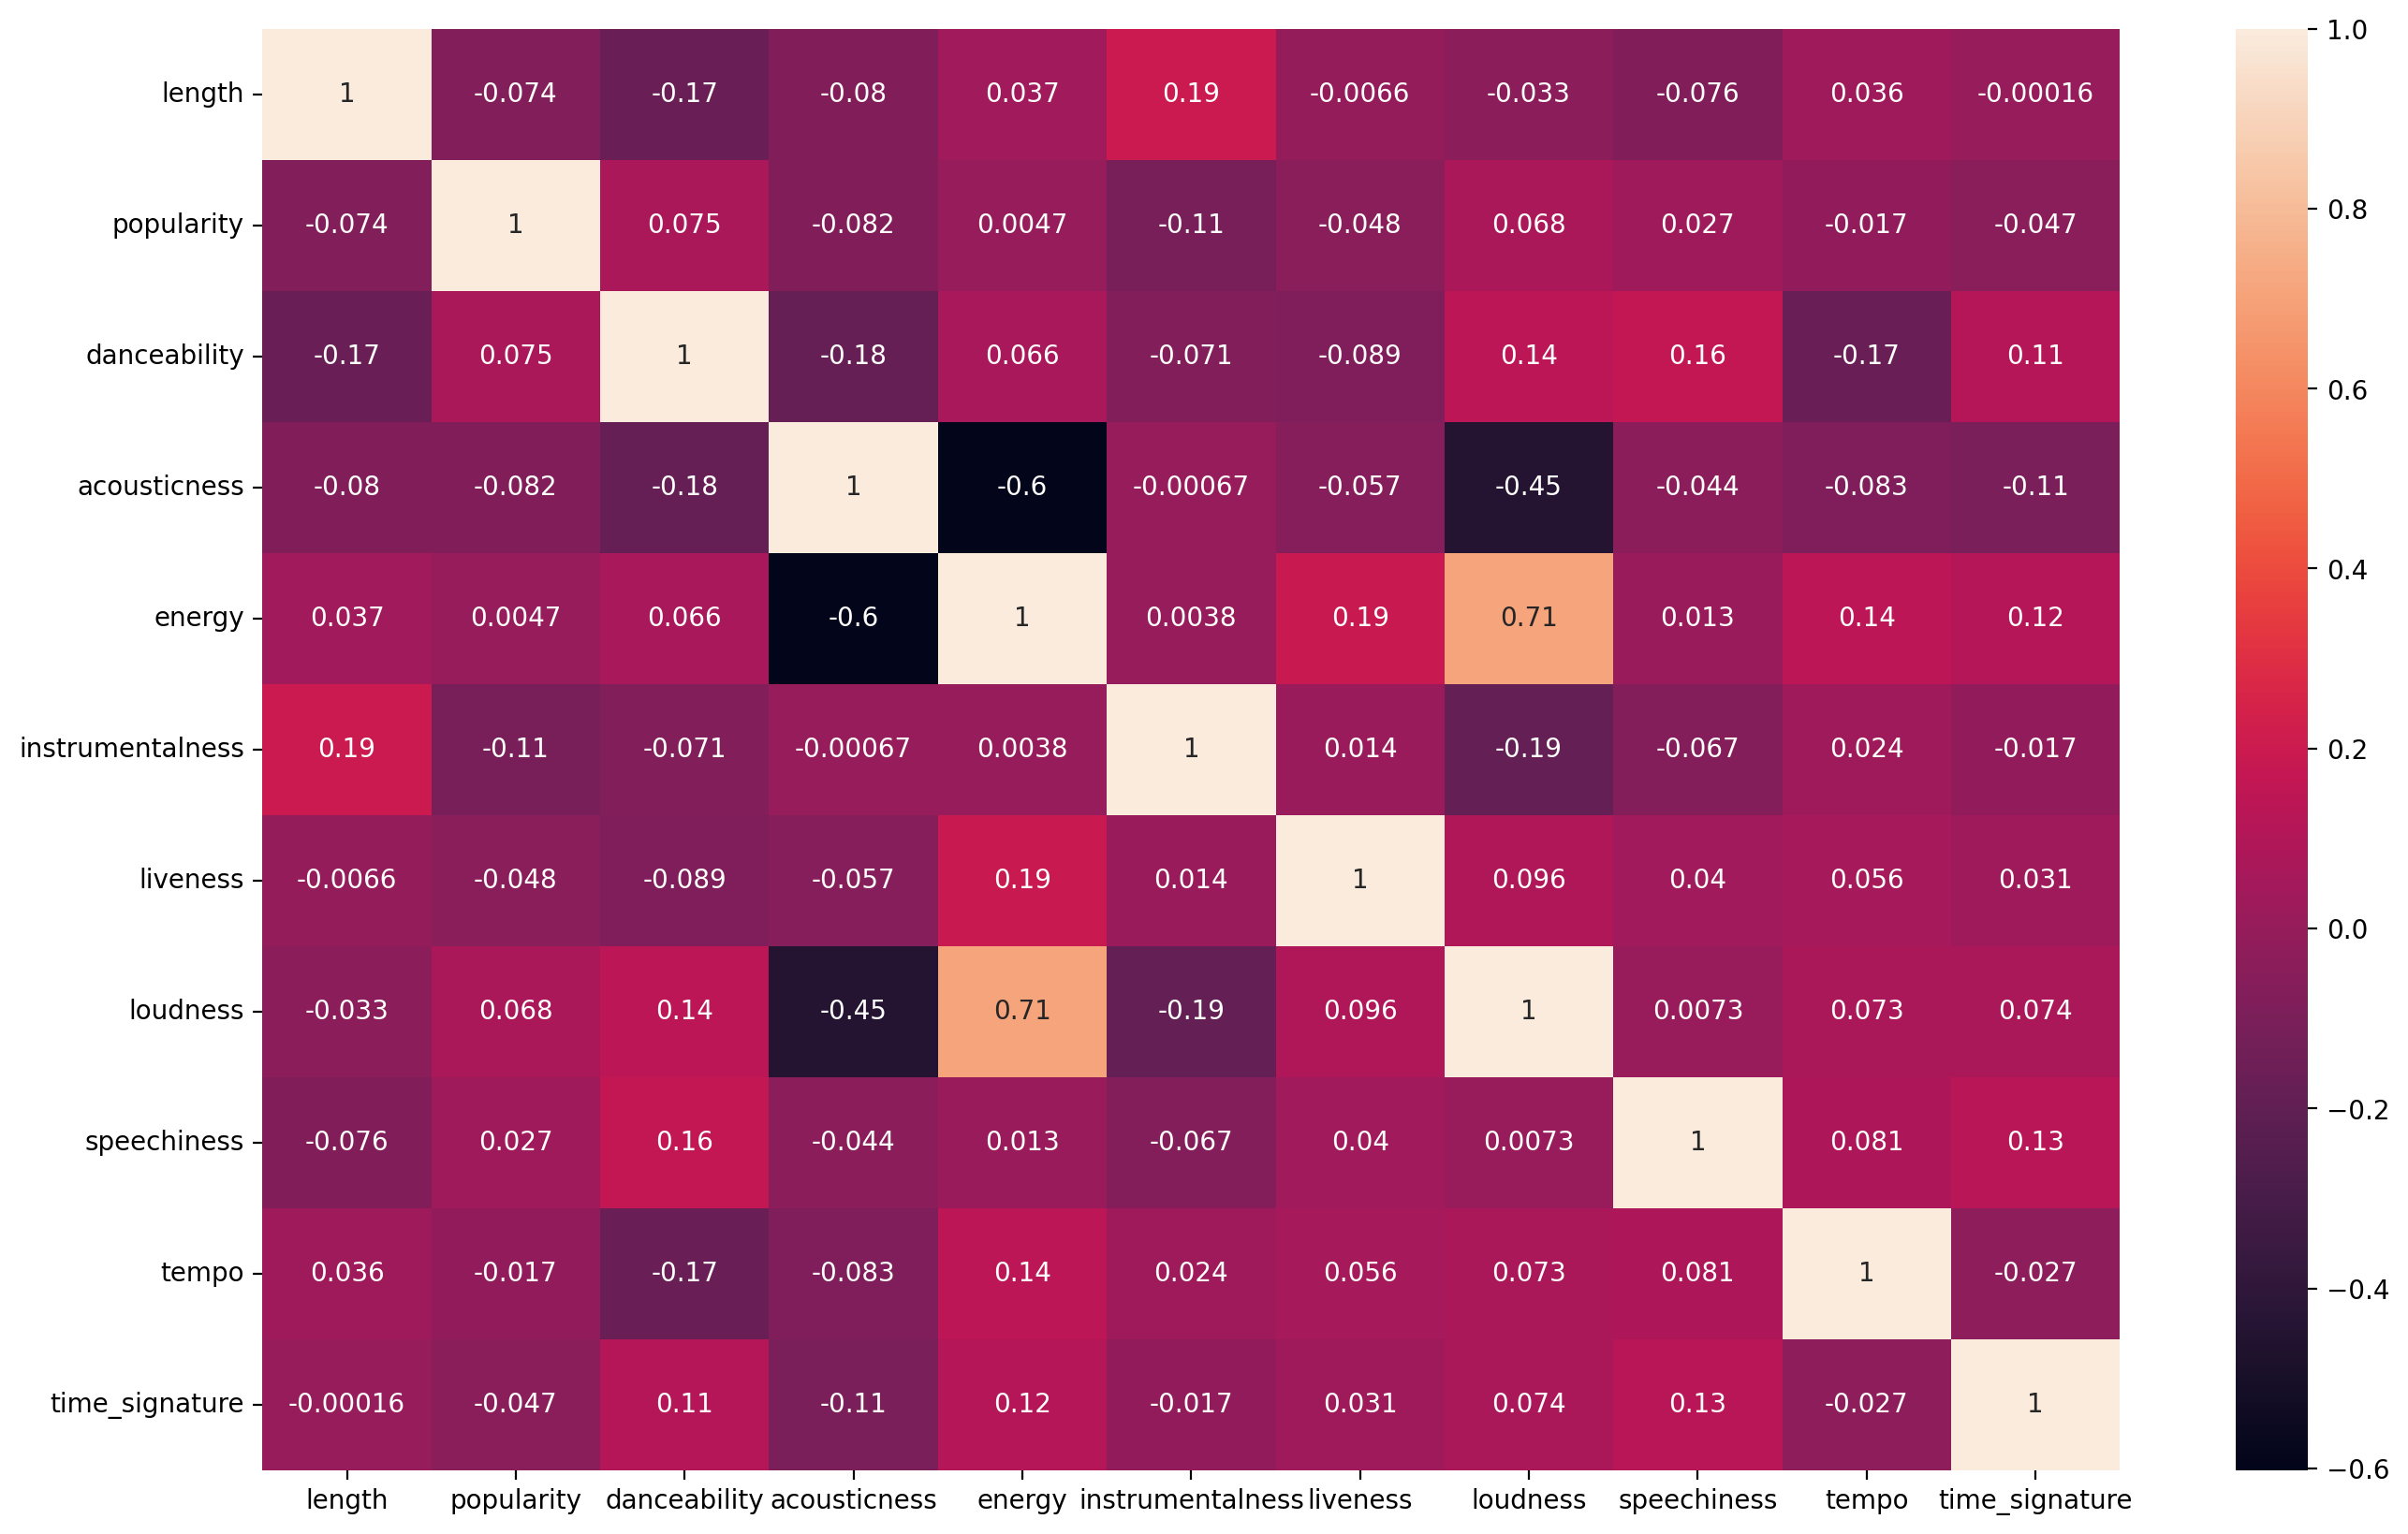

In [30]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)

### BUILDING MODEL

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
meta = data.values
cosine_sim = cosine_similarity(meta, meta)

In [32]:
def get_recommendations(idx, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index
    
    # Return the top 10 most similar songs
    return song_index



### TEST 

In [33]:
id_find = 184	
recommend_id = get_recommendations(id_find, cosine_sim)
recommend_id =list(map(lambda id: id + 10000, recommend_id))
origin_song = id_find + 10000
recommend_id.insert(0,origin_song)
recommend_id

[10184, 10058, 10073, 10479, 10575, 10724, 10989, 11748, 12276, 12539, 12786]

In [34]:
song_id.query('id in @recommend_id')

,id,name,album,artist,release_date
58,10058,Money,Money,Cardi B,2018-10-23
73,10073,Ladbroke Grove,AJ Tracey,AJ Tracey,2019-02-08
184,10184,JIKJIN,THE SECOND STEP : CHAPTER ONE,TREASURE,2022-02-15
479,10479,Dime Si Te Acuerdas,Dime Si Te Acuerdas,Bad Bunny,2018-02-22
575,10575,Love Lies (with Normani),Love Lies (with Normani),Khalid,2018-02-14
724,10724,Aristocrate,En esprit,Heuss L'enfoiré,2019-01-25
989,10989,INDUSTRY BABY (feat. Jack Harlow),INDUSTRY BABY (feat. Jack Harlow),Lil Nas X,2021-07-23
1748,11748,INDUSTRY BABY (feat. Jack Harlow),MONTERO,Lil Nas X,2021-09-17
2276,12276,Questions,Questions,Lost Frequencies,2022-06-03
2539,12539,Drive (feat. Wes Nelson),Drive (feat. Wes Nelson),Clean Bandit,2021-07-30
